### Chapter 2

### Theorem 2 (Impact of Imposing a Little Fairness on Social Welfare). 
- Assume that the demand is either (i) linear (i.e., $V_i$ ~ $U(0, b_i)$ with $b_0$ ≠ $b_1$) or (ii) exponential (i.e., $V_i$ ~ Exp($\lambda_i$) with $\lambda_{0}$ ≠ $\lambda_{1}$). Then, W'(0) > 0 under price or no-purchase valuation fairness, whereas W'(0) < 0 under demand or surplus fairness.

#

In [52]:
import numpy as np
from scipy.optimize import minimize

# Group 0: Uniform distribution
b_0 = 2
F_0 = lambda x: np.clip(x / b_0, 0, 1)
d_0 = lambda x: F_0(x) * x

# Group 1: Exponential distribution
lambda_1 = 1
F_1 = lambda x: np.clip(1 - np.exp(-lambda_1 * x), 0, 1)
d_1 = lambda x: F_1(x) * x

# Social welfare function for a given α
def social_welfare(alpha, price_fairness=True):
    if price_fairness:
        constraint = {'type': 'ineq', 'fun': lambda p: (1 - alpha) * (d_0(p[0]) - d_1(p[1]))}
    else:
        # Using no-purchase valuation fairness
        constraint = {'type': 'ineq', 'fun': lambda p: (1 - alpha) * ((1 - F_0(p[0])) - (1 - F_1(p[1])))}

    def objective(p):
        return -(d_0(p[0]) + d_1(p[1]))

    initial_guess = [1, 1]
    bounds = [(0, None), (0, None)]

    res = minimize(objective, initial_guess, bounds=bounds, constraints=constraint)
    return -res.fun

# Calculate the derivative of social welfare at α = 0
def welfare_derivative(price_fairness=True):
    epsilon = 1e-5
    return (social_welfare(epsilon, price_fairness) - social_welfare(0, price_fairness)) / epsilon

# Results
print("W'(0) for price fairness:", welfare_derivative(price_fairness=True))
print("W'(0) for no-purchase valuation fairness:", welfare_derivative(price_fairness=False))


W'(0) for price fairness: 1.440956329089666e+36
W'(0) for no-purchase valuation fairness: 9.29326664824513e+35


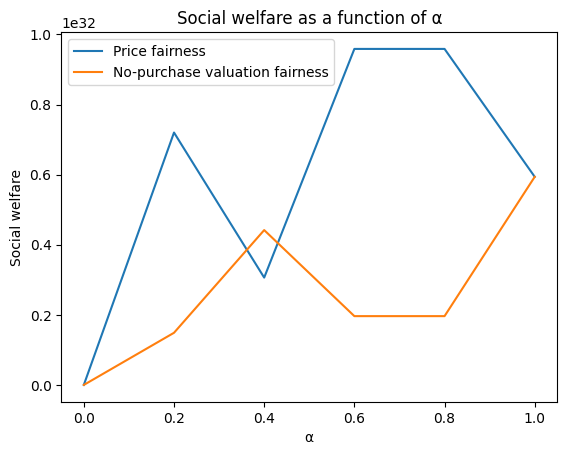

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of α values
alphas = np.linspace(0, 1, 6)

# Calculate social welfare for price fairness and no-purchase valuation fairness
social_welfare_price_fairness = [social_welfare(alpha, price_fairness=True) for alpha in alphas]
social_welfare_no_purchase_valuation_fairness = [social_welfare(alpha, price_fairness=False) for alpha in alphas]

# Plot the results
plt.plot(alphas, social_welfare_price_fairness, label="Price fairness")
plt.plot(alphas, social_welfare_no_purchase_valuation_fairness, label="No-purchase valuation fairness")

# Add labels and legend
plt.xlabel("α")
plt.ylabel("Social welfare")
plt.legend()
plt.title("Social welfare as a function of α")

# Show the plot
plt.show()

In [54]:
from scipy.optimize import minimize

def social_welfare(alpha, fairness_type):
    # Define demands
    def d_0(p):
        return (2 - p) / 2

    def d_1(p):
        return np.exp(-p)

    def S_0(p):
        return p ** 2

    def S_1(p):
        return p

    # Define the objective function to maximize
    def objective(p):
        return -(d_0(p[0]) * p[0] + d_1(p[1]) * p[1])

    # Define the constraint
    def constraint(alpha, p, fairness_type):
        if fairness_type == 'demand':
            return (1 - alpha) * (d_0(p_star[0]) - d_1(p_star[1])) - np.abs(d_0(p[0]) - d_1(p[1]))
        elif fairness_type == 'surplus':
            return (1 - alpha) * (S_0(p_star[0]) - S_1(p_star[1])) - np.abs(S_0(p[0]) - S_1(p[1]))

    p_star = minimize(objective, x0=(1, 1)).x
    res = minimize(lambda p: objective(p), x0=(1, 1), constraints={'type': 'ineq', 'fun': lambda p: constraint(alpha, p, fairness_type)})
    return -res.fun

def welfare_derivative(fairness_type):
    epsilon = 1e-5
    return (social_welfare(epsilon, fairness_type) - social_welfare(0, fairness_type)) / epsilon

# Results
print("W'(0) for demand fairness:", welfare_derivative('demand'))
print("W'(0) for surplus fairness:", welfare_derivative('surplus'))


W'(0) for demand fairness: -1.7593704271234853e-07
W'(0) for surplus fairness: 0.0


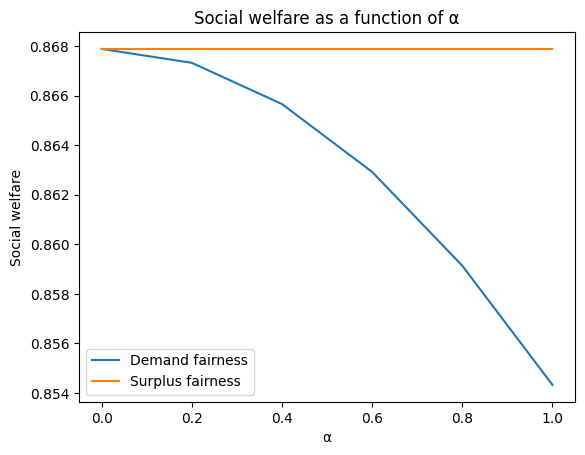

In [55]:
# Generate a range of α values
alphas = np.linspace(0, 1, 6)

# Calculate social welfare for demand fairness and surplus fairness
social_welfare_demand_fairness = [social_welfare(alpha, fairness_type='demand') for alpha in alphas]
social_welfare_surplus_fairness = [social_welfare(alpha, fairness_type='surplus') for alpha in alphas]

# Plot the results
plt.plot(alphas, social_welfare_demand_fairness, label="Demand fairness")
plt.plot(alphas, social_welfare_surplus_fairness, label="Surplus fairness")

# Add labels and legend
plt.xlabel("α")
plt.ylabel("Social welfare")
plt.legend()
plt.title("Social welfare as a function of α")

# Show the plot
plt.show()